In [5]:
import sounddevice as sd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(context='paper', style='ticks', font_scale=1)

In [4]:
!pip3 install sounddevice

  Using cached sounddevice-0.4.7-py3-none-macosx_10_6_x86_64.macosx_10_6_universal2.whl (108 kB)

[notice] A new release of pip is available: 23.3.1 -> 24.1.2
[notice] To update, run: python3.10 -m pip install --upgrade pip


## 1. Soundwave

### 1.1. Basic properties: frequency and amplitude

In [6]:
FREQUENCY = 2 # measured in Hz
AMPLITUDE = 500 # measured in mV
DURATION = 1 # measured in seconds

In [7]:
t = np.linspace(0, DURATION, int(44100 * DURATION), endpoint=False)
wave = AMPLITUDE * np.sin(2 * np.pi * FREQUENCY * t)
wave = wave.round(4)

In [8]:
sd.play(wave, samplerate=44100)
sd.wait() 

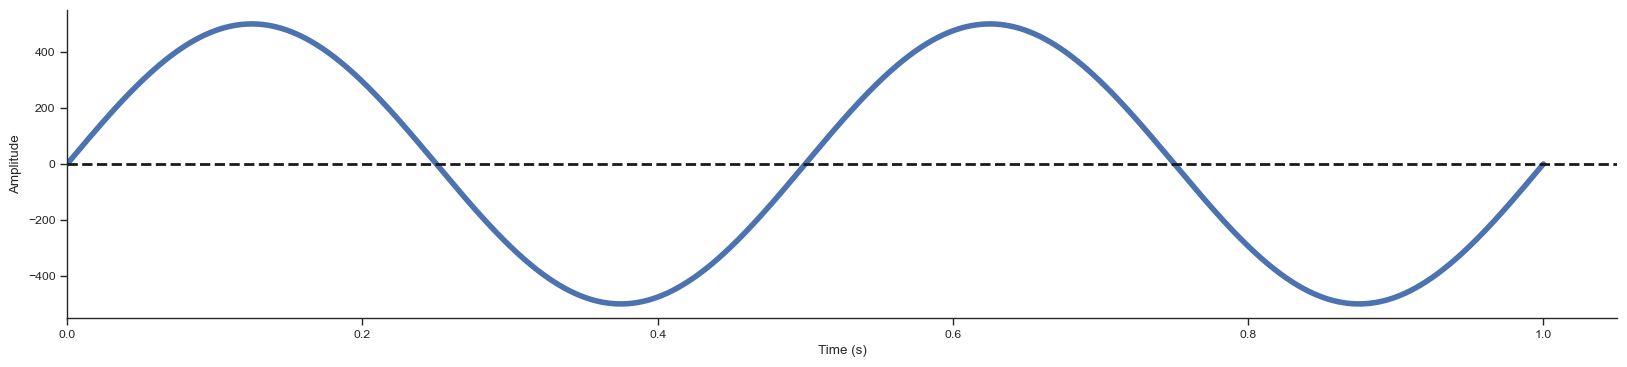

In [9]:
plt.figure(figsize=(20, 4))
plt.plot(t, wave, linewidth=4)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
# indicate frequency as intercection of the wave with the x-axis
plt.axhline(y=0, color='k', linestyle='--', linewidth=2)

plt.xlim(-0, None)
sns.despine()
plt.show()

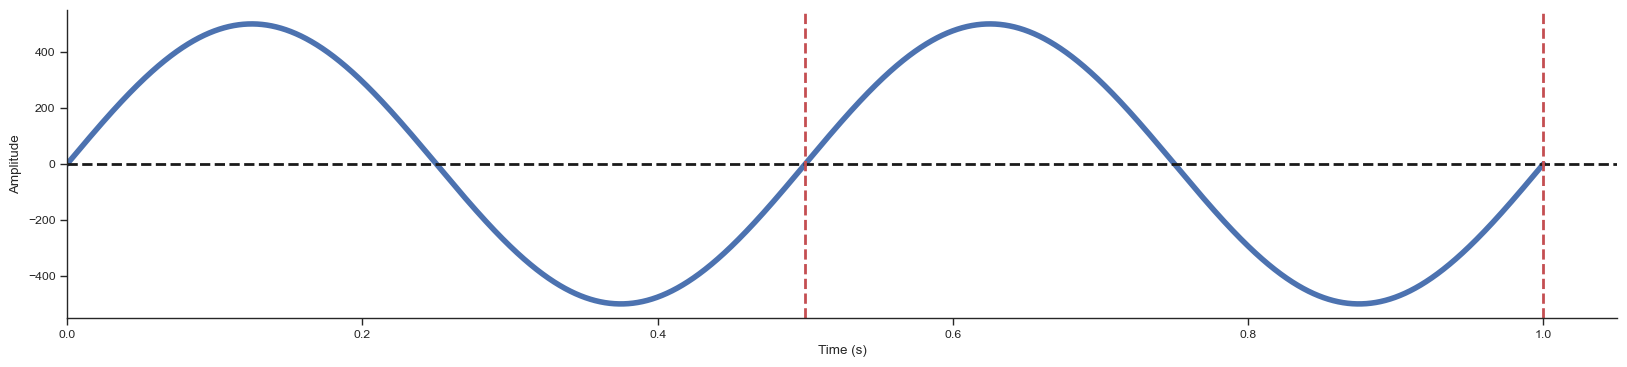

In [10]:
plt.figure(figsize=(20, 4))
plt.plot(t, wave, linewidth=4)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
# indicate frequency as intercection of the wave with the x-axis
plt.axhline(y=0, color='k', linestyle='--', linewidth=2)

# delimit one full wave
plt.axvline(x=0, color='r', linestyle='--')
plt.axvline(x=1/FREQUENCY, color='r', linestyle='--', linewidth=2)
plt.axvline(x=2/FREQUENCY, color='r', linestyle='--', linewidth=2)

plt.xlim(-0, None)
sns.despine()
plt.show()

In [11]:
# find the values of x where the wave is at 1000
crest_y = np.where(wave == AMPLITUDE)[0]
crest_x = t[crest_y][0]

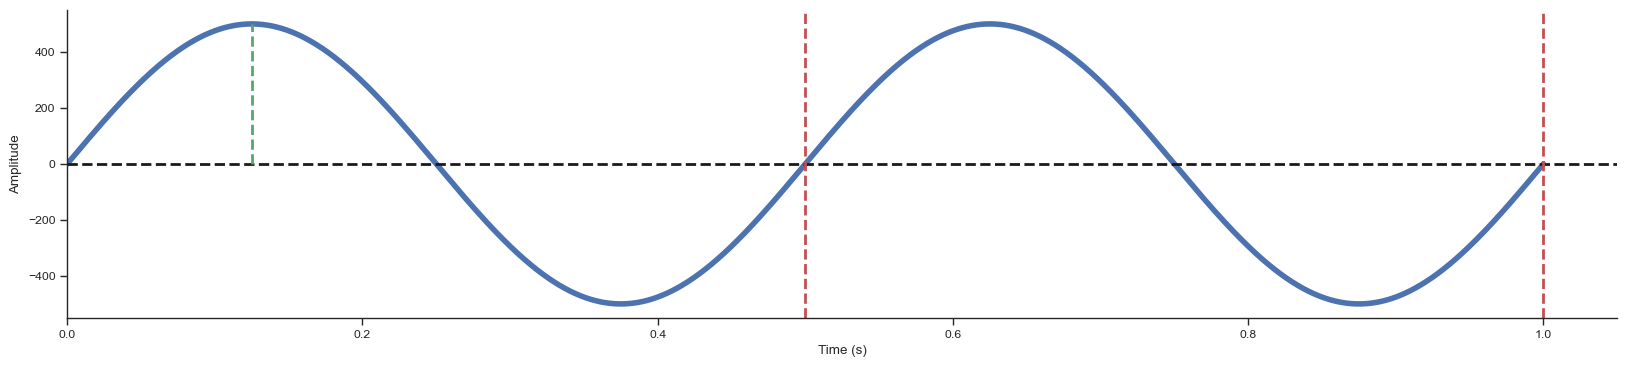

In [12]:
plt.figure(figsize=(20, 4))
plt.plot(t, wave, linewidth=4)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
# indicate frequency as intercection of the wave with the x-axis
plt.axhline(y=0, color='k', linestyle='--', linewidth=2)

# delimit full waves
plt.axvline(x=0, color='r', linestyle='--')
plt.axvline(x=1/FREQUENCY, color='r', linestyle='--', linewidth=2)
plt.axvline(x=2/FREQUENCY, color='r', linestyle='--', linewidth=2)

# plot the crest as a vertical line from y = 0 to the crest [crest_x, 0], [crest_x, AMPLITUDE]
plt.plot([crest_x, crest_x], [0, AMPLITUDE], 
         color='g', linestyle='--', linewidth=2)

plt.xlim(-0, None)
sns.despine()
plt.show()

### 1.2. Let's change the properties!

First, we will turn our sound generating mechanism into a function

In [13]:
def generate_sound(frequency, amplitude, duration, sample_rate = 44100):
    t = np.linspace(0, duration, int(sample_rate * duration), False)
    return amplitude * np.sin(frequency * 2 * np.pi * t)

We would also need a function to play it

In [14]:
def play_sound(sound):
    sd.play(sound, samplerate=44100)
    sd.wait()

Let's generate a sound with a higher frequency and a lower amplitude

In [58]:
sound = generate_sound(frequency = 130, # do (C3) 
                       amplitude = 1, 
                       duration = 1)

In [59]:
play_sound(sound)

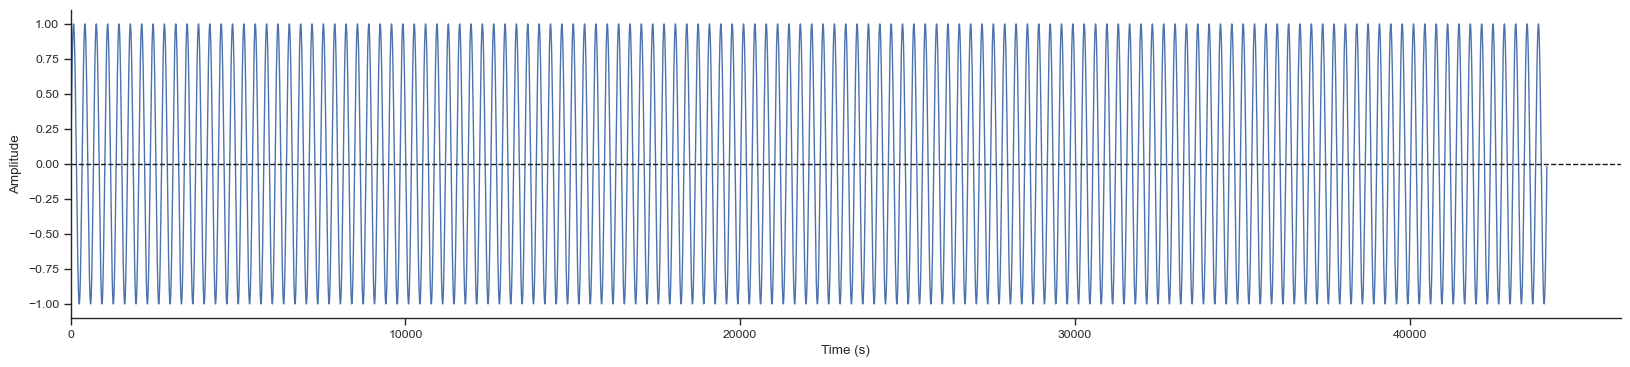

In [60]:
plt.figure(figsize=(20, 4))
plt.plot(sound, linewidth=1)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.axhline(y=0, color='k', linestyle='--', 
            linewidth=1)

plt.xlim(-0, None)
sns.despine()

## 2. Spectrograms

We will be relying on [parselmouth](https://parselmouth.readthedocs.io/en/stable/index.html) to generate the spectrograms and analyze them.

In [80]:
import parselmouth # import the parselmounth library

### 2.2. Spectrogram of speech

Let's read our file first:

In [81]:
snd = parselmouth.Sound('data/ta-ta-ta.wav')

We can use our previously written function to play the sound:

In [82]:
play_sound(snd.values[0])

Let's plot the speech signal as a function of time and amplitude

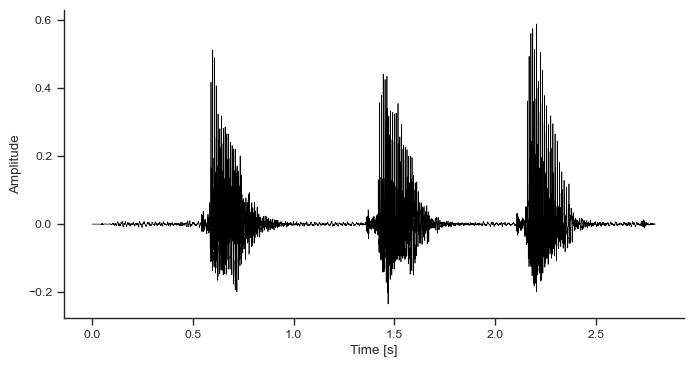

In [85]:
plt.figure(figsize=(8, 4)) # define the figure size
plt.plot(snd.xs(), snd.values.T, 
         linewidth=0.5, color='black') # plot the amplitude as a function of time
plt.xlabel("Time [s]") # set the x-axis label
plt.ylabel("Amplitude") # set the y-axis label
sns.despine() # remove the top and right spines (just for aesthetics)
plt.show() 

In [96]:
def draw_spectrogram(spectrogram, dynamic_range=70):
    X, Y = spectrogram.x_grid(), spectrogram.y_grid() # get the x and y coordinates
    sg_db = 10 * np.log10(spectrogram.values) # convert the intensity to dB
    plt.pcolormesh(X, Y, sg_db, vmin=sg_db.max() - dynamic_range, cmap='Greys') # plot the spectrogram
    plt.ylim([0, 5000]) # let's limit the spectrogram to 5000 Hz (range of human voice)
    plt.xlabel("Time [s]") # set the x-axis label
    plt.ylabel("Frequency [Hz]") # set the y-axis label

In [97]:
spectrogram = snd.to_spectrogram()

/var/folders/1c/pphtjl397rnbdcp94xmwzkqr0000gn/T/ipykernel_4582/3585317524.py:3: RuntimeWarning: divide by zero encountered in log10
  sg_db = 10 * np.log10(spectrogram.values) # convert the intensity to dB


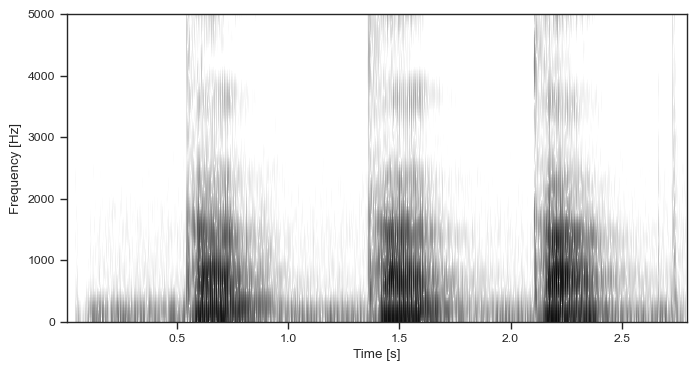

In [98]:
plt.figure(figsize=(8, 4))
draw_spectrogram(spectrogram)